# Flight Price Prediction


## Description:

Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records


In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_data = pd.read_excel("Data_Train.xlsx")
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


FEATURES:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

Where "Price" is the Dependent or Target Feature

### The Data_Train sets contains :

Number of columns : 11

Number of rows : 10683

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

We can see that null values are present in the variables "Route" and "Total_Stops"

In [9]:
train_data['Route'] = train_data["Route"].fillna(method = 'ffill')

In [11]:
train_data['Total_Stops'] = train_data["Total_Stops"].fillna(method = 'ffill')

In [12]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


From description we can see that Date_of_Journey is a object data type, Therefore, we have to convert this datatype into timestamp to use this column properly for prediction For this we require pandas to_datetime to convert object data type to datetime dtype.

In [17]:
train_data["Journey_day"] =pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.day
train_data["Journey_month"] =pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.month

In [18]:
train_data["Journey_year"] =pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.year

In [16]:
train_data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


since we have extracted relevant data from the Date of journey so we'll be droping Date_of_Journey from the dataset.

In [21]:
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [19]:
#extracting hours and minutes drom the Dep_hour

#Extracting Hours 
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes 
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [22]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [23]:
# similarly extracting hours and minutes drom the Dep_hour

#Extracting Hours 
train_data["Arrival_hour"] = pd.to_datetime(train_data["Arrival_Time"]).dt.hour

# Extracting Minutes 
train_data["Arrival_min"] = pd.to_datetime(train_data["Arrival_Time"]).dt.minute

# Now we can drop Dep_Time as it of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [24]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [25]:
# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [26]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] =duration_mins

In [28]:
train_data.drop(["Duration"], axis =1, inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [36]:
## Handing Categorical data

In [39]:
df_categorical = train_data[['Airline','Source','Destination','Route']]

In [44]:
for i in df_categorical:
    print("********", i ,"********")
    print(train_data[i].value_counts())
    print('\n\n')

******** Airline ********
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64



******** Source ********
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64



******** Destination ********
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64



******** Route ********
DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR               

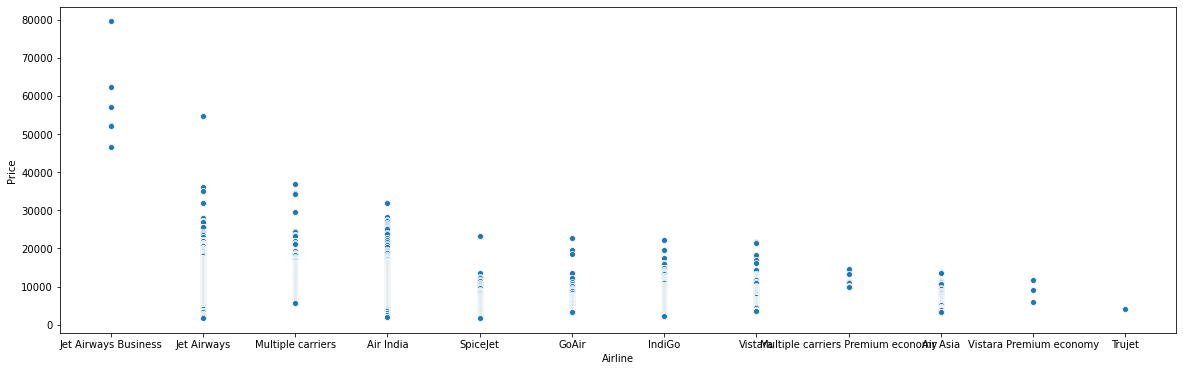

In [49]:
plt.figure(figsize = [20,6])
sns.scatterplot(y= "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False))
plt.show()

the price of jet airways business airline is maximum as it ranges from 40,000 to 60,000 and a single value at 80,000. multiple carrier premium economy shows minimum range of price fair,thats ranges from 10,000 t0 20,000.

In [50]:
# As Airline is Nominal Categorical data, we will perform OneHotEncoder

Airline = train_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first =True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


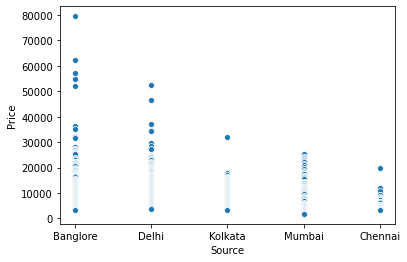

In [54]:
#Compare Source and Price using scatterplot

sns.scatterplot(y = "Price", x= "Source", data = train_data.sort_values("Price", ascending = False))

as we can see that some outliers are present in the Banglore,delhi ,kokalta and chennai.

Lowest price of all the source is almost same.the maximum fare for banglore is almost 40000(excluding the outlier).The maximum from delhi is around 30,000,from kolkata its 20,000 ,for mumbai its almost 30000 and for chennai its around 15000(excluding the outliers from all the sources)

In [55]:
Source =train_data[["Source"]]
Source =pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


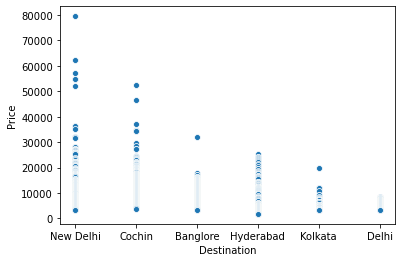

In [58]:
#doing analysis for destination variable.
#Compare Source and Price using scatterplot

sns.scatterplot(y = "Price", x= "Destination", data = train_data.sort_values("Price", ascending = False))

as we can see that some outliers are present in the Banglore,New delhi ,kokalta and cochin.

Lowest price of all the source is almost same.the maximum fare for New delhi is almost 40000(excluding the outlier).The maximum for cochin is around 30,000,for Banglore its around 20,000 ,for Hyderabad its almost 30000 and for Kolkata its around  15000(excluding the outliers from all the sources).The lowest destination fare is of delhi.

In [59]:
# As Destination is Nominal categorical data, we will perform OneHotEncoding 

Destination =train_data[["Destination"]]

Destination =pd.get_dummies(Destination, drop_first=True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [60]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_data.drop(["Route","Additional_Info"],axis=1, inplace=True)

In [62]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,16,50,21,35,4,45


In [63]:
# analysing total stops
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3492
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [65]:
#as the total stops are ordinal category we'll be using ordinal encoder.
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
train_data['Total_Stops'] = oe.fit_transform(train_data[['Total_Stops']])

In [67]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,4.0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,1.0,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,1.0,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,0.0,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,0.0,13302,1,3,2019,16,50,21,35,4,45


In [68]:
# Concatenate dataframe that consist of train_data, Airline, Source,  and Destination
data_train =pd.concat([train_data,Airline,Source,Destination], axis=1)
data_train.head()


,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,4.0,3897,24,3,2019,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,1.0,7662,1,5,2019,5,50,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1.0,13882,9,6,2019,9,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,0.0,6218,12,5,2019,18,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,0.0,13302,1,3,2019,16,50,...,0,0,0,0,0,0,0,0,0,1


# Test Set

In [69]:
test_data =pd.read_excel("Test_set.xlsx")

In [70]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [71]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [72]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [73]:
data_train.shape

(10683, 34)

In [77]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,4.0,3897,24,3,2019,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,1.0,7662,1,5,2019,5,50,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1.0,13882,9,6,2019,9,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,0.0,6218,12,5,2019,18,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,0.0,13302,1,3,2019,16,50,...,0,0,0,0,0,0,0,0,0,1


In [115]:
data_train.describe()

,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.0,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,1.458485,9087.064121,13.508378,4.708602,2019.0,12.490686,24.411214,13.348778,24.690630,10.246092,28.327717,0.163999,0.018160,0.192174,0.360292,0.000562,0.111954,0.001217,0.076570,0.000094,0.044838,0.000281,0.035664,0.424693,0.268745,0.065244,0.424693,0.118412,0.065244,0.035664,0.087241
std,1.806403,4611.359167,8.479277,1.164357,0.0,5.748650,18.767980,6.859125,16.506036,8.495414,16.945400,0.370292,0.133535,0.394028,0.480108,0.023693,0.315324,0.034864,0.265921,0.009675,0.206957,0.016756,0.185460,0.494320,0.443328,0.246967,0.494320,0.323111,0.246967,0.185460,0.282202
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,8372.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,12373.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
data_train.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Journey_year', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [78]:
X = data_train.drop(['Price'],axis = 1)
X.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,4.0,24,3,2019,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,1.0,1,5,2019,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1.0,9,6,2019,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,0.0,12,5,2019,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,0.0,1,3,2019,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [164]:
X = data_train.drop(['Price','Airline','Source',"Destination","Journey_year"],axis = 1)

In [165]:
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4.0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.0,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1.0,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0.0,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0.0,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [80]:
y = data_train['Price']

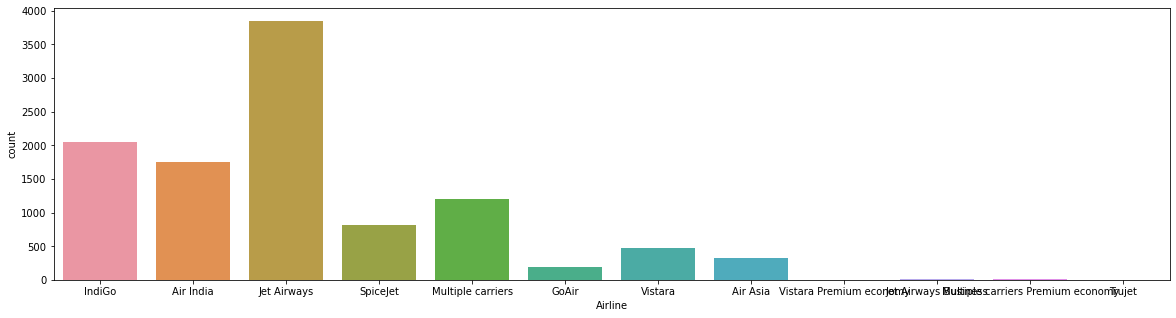

Observation: In the dataset most of the the passengers prefer travelling via jet airways,followed by Indigo and Air india.


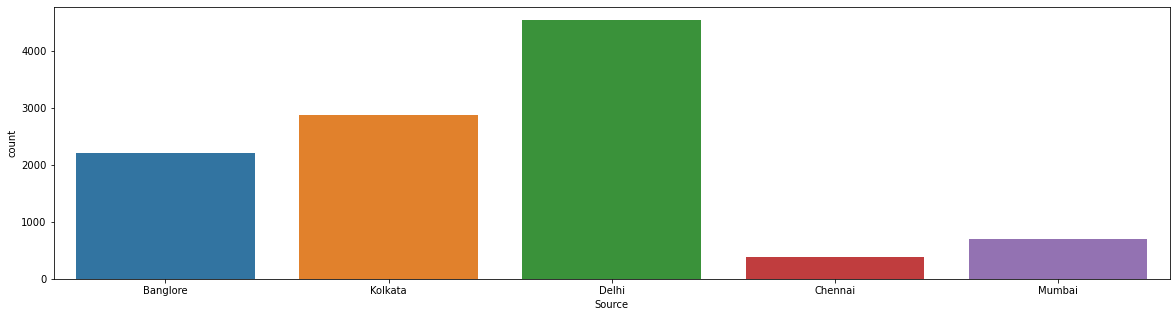

Observation: The source of most of the flight is Delhi and minimum flights has source as chennai.


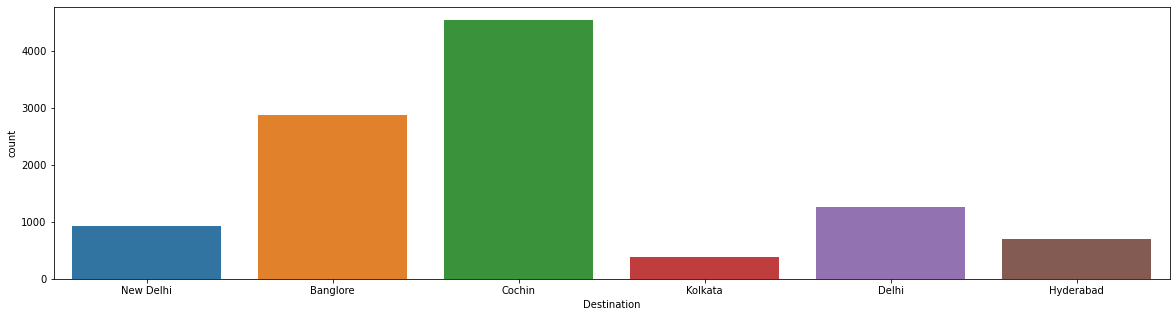

Observation: destination of most of the flight is chochin and minimum is Kokalata.


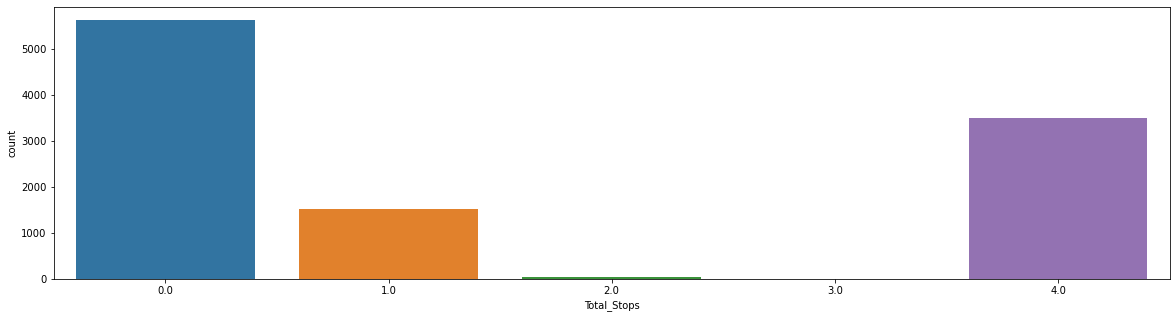

Observation: 


In [83]:
for i in data_train[["Airline","Source","Destination","Total_Stops"]]:
    plt.figure(figsize = [20,5])
    sns.countplot(data_train[i])
    plt.show()
    x = input("Observation: ")

In [ ]:
for i in df_continous:
    plt.figure(figsize = [6,5])
    plt.xlabel(i)
    sns.distplot(df_continous[[i]],kde = True)
    plt.show()

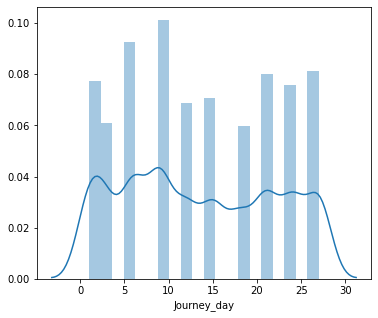

In [84]:
plt.figure(figsize = [6,5])
plt.xlabel("Journey_day")
sns.distplot(data_train[['Journey_day']],kde = True)
plt.show()

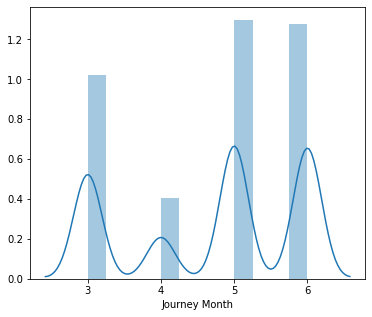

In [86]:
#Distribution plot for journey month
plt.figure(figsize = [6,5])
plt.xlabel("Journey Month")
sns.distplot(data_train[['Journey_month']],kde = True)
plt.show()

observations: Most of the passengers have travelled between the month of march  to june.Passengers has travelled maximum in the month of may.

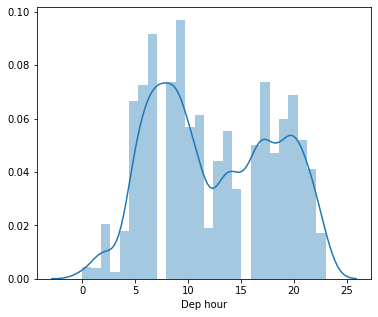

In [88]:
#Distribution plot for Departure hour
plt.figure(figsize = [6,5])
plt.xlabel("Dep hour")
sns.distplot(data_train[['Dep_hour']],kde = True)
plt.show()

Not much insights can be developed.

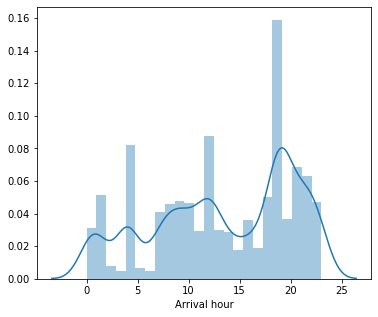

In [89]:
#Distribution plot for Arrival hour
plt.figure(figsize = [6,5])
plt.xlabel("Arrival hour")
sns.distplot(data_train[['Arrival_hour']],kde = True)
plt.show()

the arrival time of most of the fights are either 4 am in the morning,12pm in the afternoon or 7pm in the evening.

<Figure size 432x360 with 0 Axes>

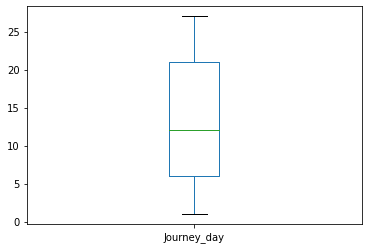

In [90]:
#checking outliers using boxplot
plt.figure(figsize = [6,5])
data_train[['Journey_day']].plot.box()
plt.show()

<Figure size 432x360 with 0 Axes>

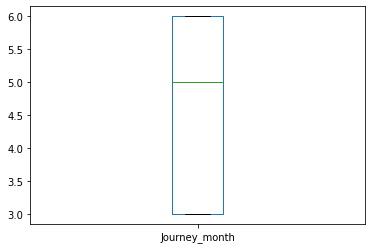

In [91]:
#checking outliers using boxplot in journey month
plt.figure(figsize = [6,5])
data_train[['Journey_month']].plot.box()
plt.show()

<Figure size 432x360 with 0 Axes>

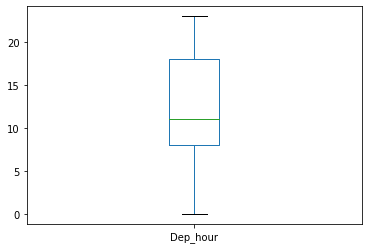

In [92]:
#checking outliers using boxplot in journey month
plt.figure(figsize = [6,5])
data_train[['Dep_hour']].plot.box()
plt.show()

<Figure size 432x360 with 0 Axes>

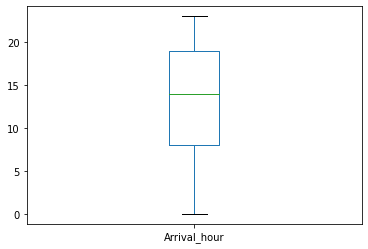

In [93]:
#checking outliers using boxplot in journey month
plt.figure(figsize = [6,5])
data_train[['Arrival_hour']].plot.box()
plt.show()

No such ouliers present in any of the above feature.

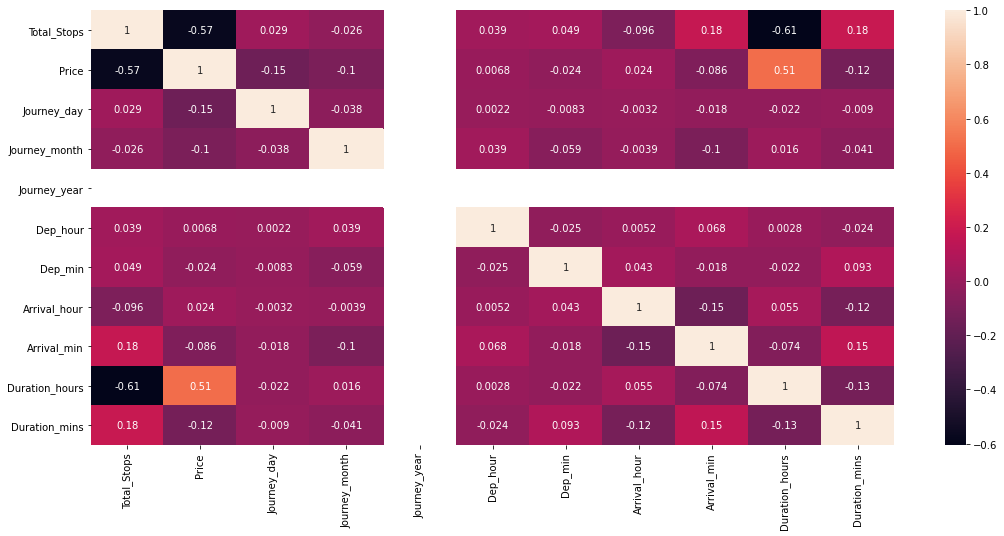

In [99]:
#checking correlation of the feature

#Find correlation between Independent(X) and dependent attributes(y)

plt.figure(figsize = (18,8))
sns.heatmap(train_data.corr(),annot= True,)
plt.show()

Observation:
1. Duration_hours is highly correlated to the Price of the flight.(0.51)
2. Total_Stops is highly negatively correlated to the price of flight(-0.57)
3. Duration hours and total stops are negatively correlated to each other.(-0.61)

In [102]:
#checking correlation woth the target variable
corr_d = pd.DataFrame(data_train.corr())
corr_d
corr=corr_d['Price'].sort_values(ascending = False)
corr = pd.DataFrame(corr)
corr

,Price
Price,1.000000
Duration_hours,0.508672
Airline_Jet Airways,0.416135
Source_Delhi,0.270619
Destination_Cochin,0.270619
Airline_Jet Airways Business,0.253302
Destination_New Delhi,0.189785
Airline_Multiple carriers,0.139803
Airline_Air India,0.050346
Arrival_hour,0.024264


observations: 
1. Duration_hours ,Airline_Jet Airways and price are highly correlated to each other.
2. Destination_Delhi,Airline_IndiGo,Total_Stops are highly negatively correlated to Price.
3. Source_Kolkata,Dep_hour,Airline_Vistara Premium economy are least correlated to Price. 

In [111]:
pd.set_option('display.max_columns',None)
X.head(2)

,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4.0,24,3,2019,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.0,1,5,2019,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [112]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X['Journey_day'] = scaler.fit_transform(X[['Journey_day']])
X['Journey_month'] = scaler.fit_transform(X[['Journey_month']])
X['Dep_hour'] = scaler.fit_transform(X[['Dep_hour']])
X['Dep_min'] = scaler.fit_transform(X[['Dep_min']])
X['Arrival_hour'] = scaler.fit_transform(X[['Arrival_hour']])
X['Arrival_min'] = scaler.fit_transform(X[['Arrival_min']])
X['Duration_hours'] = scaler.fit_transform(X[['Duration_hours']])
X['Duration_mins'] = scaler.fit_transform(X[['Duration_mins']])

In [166]:
X.head(3)

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4.0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.0,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1.0,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [168]:
#for random_state check
from sklearn.linear_model import LinearRegression
Maxaccu = 0
Maxrow = 0
for i in range(1,500):
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size =.20,random_state = i)
    le = LinearRegression()
    le.fit(x_train,y_train)
    prdle =le.predict(x_test)
    accu = r2_score(y_test,prdle)
    if accu>Maxaccu:
        Maxaccu = accu
        Maxrow = i
print("max accuracy is : ",Maxaccu ,"at random state : ",Maxrow)

max accuracy is :  0.6527602012748088 at random state :  58


maximum accuracy of the model is at random state 58.

In [169]:
#creating train test split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = .20,random_state = 58)

In [170]:
#first using Linear regression to check the accuracy of the model,with the help of r2 score,Mean squared error and mean absolute error.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
prdlr = lr.predict(x_test)
print("Accuracy of the model :",r2_score(y_test,prdlr))
print("Mean Squared error :",mean_squared_error(y_test,prdlr))
print("Mean Absolute eroor :",mean_absolute_error(y_test,prdlr))
print("RMSE:" , np.sqrt(mean_squared_error(y_test,prdlr)))

Accuracy of the model : 0.6527602012748088
Mean Squared error : 7976060.636985436
Mean Absolute eroor : 2041.498701015781
RMSE: 2824.192032597188


In [171]:
#first using DecisionTreeRegressor to check the accuracy of the model,with the help of r2 score,Mean squared error and mean absolute error.
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor()
dtc.fit(x_train,y_train)
prdtc = dtc.predict(x_test)
print("Accuracy of the model :",r2_score(y_test,prdtc))
print("Mean Squared error :",mean_squared_error(y_test,prdtc))
print("Mean Absolute eroor :",mean_absolute_error(y_test,prdtc))
print("RMSE:" , np.sqrt(mean_squared_error(y_test,prdtc)))

Accuracy of the model : 0.7427354565052958
Mean Squared error : 5909338.751472079
Mean Absolute eroor : 1327.5534627983154
RMSE: 2430.9131517748797


In [172]:
#first using RandomForestRegressor to check the accuracy of the model,with the help of r2 score,Mean squared error and mean absolute error.
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()
rfc.fit(x_train,y_train)
prrfc = rfc.predict(x_test)
print("Accuracy of the model :",r2_score(y_test,prrfc))
print("Mean Squared error :",mean_squared_error(y_test,prrfc))
print("Mean Absolute eroor :",mean_absolute_error(y_test,prrfc))
print("RMSE:" , np.sqrt(mean_squared_error(y_test,prrfc)))

Accuracy of the model : 0.8126168962284801
Mean Squared error : 4304169.635840046
Mean Absolute eroor : 1206.6127307321701
RMSE: 2074.649280201366


In [173]:
#first using KNeighborsRegressor to check the accuracy of the model,with the help of r2 score,Mean squared error and mean absolute error.
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(x_train,y_train)
prKNN = KNN.predict(x_test)
print("Accuracy of the model :",r2_score(y_test,prKNN))
print("Mean Squared error :",mean_squared_error(y_test,prKNN))
print("Mean Absolute eroor :",mean_absolute_error(y_test,prKNN))
print("RMSE:" , np.sqrt(mean_squared_error(y_test,prKNN)))

Accuracy of the model : 0.5841156824009168
Mean Squared error : 9552817.814431446
Mean Absolute eroor : 1879.4622367805334
RMSE: 3090.763306115731


observation: Among all the models Random forest regressor shows the highest accuracy score and least root mean squared error.

In [174]:
#Checking cross value score for each model
from sklearn.model_selection import cross_val_score
cross_val1 = cross_val_score(LinearRegression(),X,y,cv = 5)
print("Cross Validation score for Linear regression : ",cross_val1.mean())

Cross Validation score for Linear regression :  0.5865910335820393


In [175]:
cross_val2 = cross_val_score(RandomForestRegressor(),X,y,cv = 5)
print("Cross Validation Score for Random Forest Regressor",cross_val2.mean())

Cross Validation Score for Random Forest Regressor 0.8102996622216075


In [131]:
cross_val3 = cross_val_score(DecisionTreeRegressor(),X,y,cv = 5)
print("Cross Validation Score for Decision tree regressor",cross_val3.mean())

Cross Validation Score for Decision tree regressor 0.6980524149252885


In [133]:
cross_val4 = cross_val_score(KNeighborsRegressor(),X,y,cv = 5)
print("Cross Validation Score K Neighbors ",np.abs(cross_val4).mean())

Cross Validation Score K Neighbors  0.7271907706113867


Observations: After comparing cross validation score and accuracy score of each model we concluded that RandomForest Regressor has the least difference between the two score.Therefore we'll be using the Random Forest Regressor model.

In [176]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
#creating parameter list to pass in GridSearchCV
parameters = {'n_estimators':[0,10], 'max_features' :['auto','sqrt','log2',None], 'min_samples_leaf' : [0,10],
              'min_weight_fraction_leaf': [0.0,1.0,2.0],'n_jobs' :[1,10]}

In [177]:
GVC = GridSearchCV(RandomForestRegressor(),parameters,cv = 5)
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [0, 10],
                         'min_weight_fraction_leaf': [0.0, 1.0, 2.0],
                         'n_estimators': [0, 10], 'n_jobs': [1, 10]})

In [179]:
#checking the best parameters
GVC.best_params_

{'max_features': None,
 'min_samples_leaf': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1}

In [180]:
model = RandomForestRegressor(max_features =  None,
 min_samples_leaf =  10,
 min_weight_fraction_leaf =0.0,
 n_estimators =  10,
 n_jobs =  1, random_state = 58)

In [181]:
model.fit(x_train,y_train)
pred = model.predict(x_test)
print("accuracy score of the model is :",r2_score(y_test,pred)*100)

accuracy score of the model is : 75.3067529482264


In [198]:
#Saving the model
import joblib
joblib.dump(model,'Flight price prediction.pkl')

['Flight price prediction.pkl']